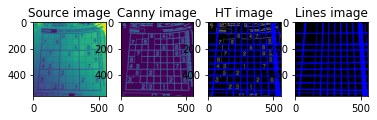

0

In [1]:
import os
import sys
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

images_dir = "./images/"

def msqErr(edges,lines):
    
    return 0

def htrans(img):
    new = cv.Canny(img, 50, 200, None, 3)
    cdst = cv.cvtColor(new, cv.COLOR_GRAY2BGR)
    blank = np.zeros((len(img),len(img[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2BGR)
    #Vector storing parameters (r,theta) of detected lines
    lines = cv.HoughLines(new, 1, np.pi / 180, 150, None, 0, 0) 

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(blank, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    return new, cdst , blank

def run():
    for file in os.listdir(images_dir):
        path = os.path.join(images_dir, file)
        if os.path.isfile(path):
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                plt.figure()
                res = htrans(img)
                plt.subplot(1,4,1)
                plt.imshow(img)
                plt.title('Source image')
                plt.subplot(1,4,2)
                plt.imshow(res[0])
                plt.title('Canny image')
                plt.subplot(1,4,3)
                plt.title('HT image')
                plt.imshow(res[1])
                plt.subplot(1,4,4)
                plt.title('Lines image')
                plt.imshow(res[2])
                
                plt.show()
                
    
    return 0

run()